Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Problem 1: Linear Regression 

The comp-activ databases is a collection of a computer systems activity measures. The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [4]:
df = pd.read_csv("Ecommerce_Sales_Data.csv")
df.head()

order_id  order_date  \
0  55fad759-2ca8-4a43-9224-55be589da0a4  12-05-2025   
1  0f2807a6-6c38-4601-998b-d378e32fcd79  01-03-2025   
2  48f084b9-1453-4ea6-af78-8bb1f230ed4a  31-10-2024   
3  f4668b39-ec95-4289-a19e-d914bf863533  09-01-2025   
4  f418d898-d43e-4d63-9710-2eb46436a9f3  01-09-2024   

                            customer_id     customer_name region product_id  \
0  9bc957d3-c7b2-45e8-9a1d-b36e931a16d1    Destiny Steele  South       P008   
1  ebcb1c2a-03c2-4738-a4a5-ebdeaaef6b18       Caleb Petty  South       P010   
2  9659b4a9-09eb-4dfb-83bb-739106d686aa  Mitchell Robbins   East       P005   
3  9c9b8db7-8bb6-4f50-81d7-a084b300d26d      Mindy Powell  South       P007   
4  bf743bf0-7343-476d-b53b-c2ce4476d7e9   Charlene Bright   West       P001   

     product_name     category  unit_price  quantity  total_price order_status  
0        Backpack  Accessories       35.00         2        70.00    Completed  
1         Pen Set   Stationery        3.50         3        10.50    Completed  
2        Notebook   Stationery        5.99         3        17.97    Completed  
3   Running Shoes     Footwear       80.00         3       240.00    Completed  
4  Wireless Mouse  Electronics       25.99         3        77.97      Pending

In [5]:
df.tail()

order_id  order_date  \
495  25e137cb-de20-45b2-9c5e-c3394bece463  14-09-2024   
496  65b02420-6912-425e-b9e0-6db5f5cbd9d2  26-10-2024   
497  f0d2f65e-fe95-41a4-afbb-f10587753b58  16-10-2024   
498  865d7a01-eb7b-439d-a897-5ef396f6b35a  28-07-2024   
499  5ea6bfa5-5cd9-4470-afe0-13e9e4562cc4  29-11-2024   

                              customer_id       customer_name region  \
495  b54ec17b-45ee-4abc-b8e4-1d52be22f393       Ryan Gonzalez  North   
496  5fd721f5-805a-426e-91ee-81335cd86255       Joseph Hoover  North   
497  35b57359-e2a7-4981-a0b5-9140cfec36bf   Jennifer Robinson  South   
498  08958f10-28c5-421e-8787-e276b73eec23         James Avila   West   
499  a7b34270-d362-4214-b3bd-9692ccbe7d3d  Mr. George Moody V   West   

    product_id       product_name     category  unit_price  quantity  \
495       P003           Yoga Mat      Fitness       20.00         4   
496       P002  Bluetooth Speaker  Electronics       45.50         4   
497       P001     Wireless Mouse  Electronics       25.99         4   
498       P006    Gaming Keyboard  Electronics       60.00         3   
499       P009       Water Bottle      Fitness       10.00         2   

     total_price order_status  
495        80.00    Completed  
496       182.00    Completed  
497       103.96    Completed  
498       180.00    Completed  
499        20.00    Completed

### Data Dictonary

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [9]:
df.shape

(500, 12)

In [10]:
print('Number of rows:',df.shape[0],'\nNumber of columns:',df.shape[1])

Number of rows: 500 
Number of columns: 12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       500 non-null    object 
 1   order_date     500 non-null    object 
 2   customer_id    500 non-null    object 
 3   customer_name  500 non-null    object 
 4   region         500 non-null    object 
 5   product_id     500 non-null    object 
 6   product_name   500 non-null    object 
 7   category       500 non-null    object 
 8   unit_price     500 non-null    float64
 9   quantity       500 non-null    int64  
 10  total_price    500 non-null    float64
 11  order_status   500 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 47.0+ KB


The dataset consists of 22 different System attributes. There are 8192 entries, data_types are of float type, object type and int type. The dataset doesn't include any null values.

In [12]:
df.describe().T

count      mean        std  min   25%    50%    75%    max
unit_price   500.0  33.01224  25.168998  3.5  10.0  25.99   45.5   80.0
quantity     500.0   2.88400   1.417944  1.0   2.0   3.00    4.0    5.0
total_price  500.0  96.33218  93.771142  3.5  20.0  60.00  140.0  400.0

In [16]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.isna().sum()

order_id         0
order_date       0
customer_id      0
customer_name    0
region           0
product_id       0
product_name     0
category         0
unit_price       0
quantity         0
total_price      0
order_status     0
dtype: int64

In [19]:
# Top 10 products by total revenue
top_products = df.groupby("product_name")["total_price"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products)

# Top 10 products by number of orders
top_products_count = df["product_name"].value_counts().head(10)
print("\nTop 10 Products by Order Count:\n", top_products_count)


Top 10 Products by Sales:
 product_name
Running Shoes        16960.00
Bluetooth Speaker     7917.00
Gaming Keyboard       6420.00
Desk Lamp             3930.00
Backpack              3850.00
Yoga Mat              3140.00
Wireless Mouse        3118.80
Water Bottle          1570.00
Notebook               724.79
Pen Set                535.50
Name: total_price, dtype: float64

Top 10 Products by Order Count:
 product_name
Running Shoes        71
Bluetooth Speaker    63
Water Bottle         56
Pen Set              55
Yoga Mat             52
Notebook             45
Wireless Mouse       43
Desk Lamp            39
Backpack             38
Gaming Keyboard      38
Name: count, dtype: int64


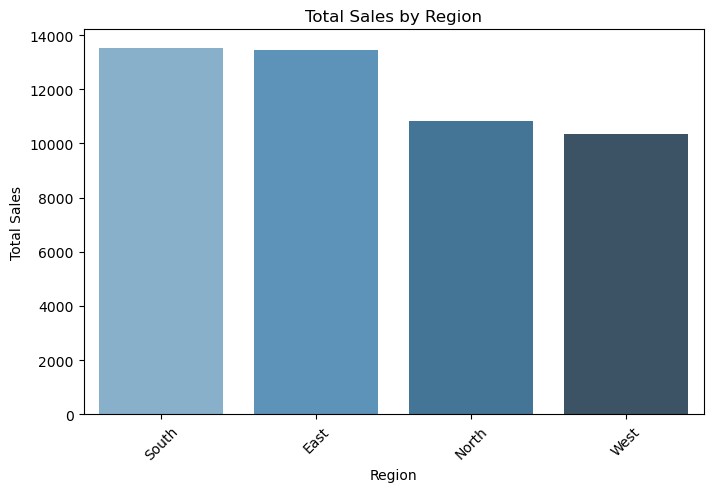

In [26]:
# Total sales by region
region_sales = df.groupby("region")["total_price"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Total sales by category
category_sales = df.groupby("category")["total_price"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()


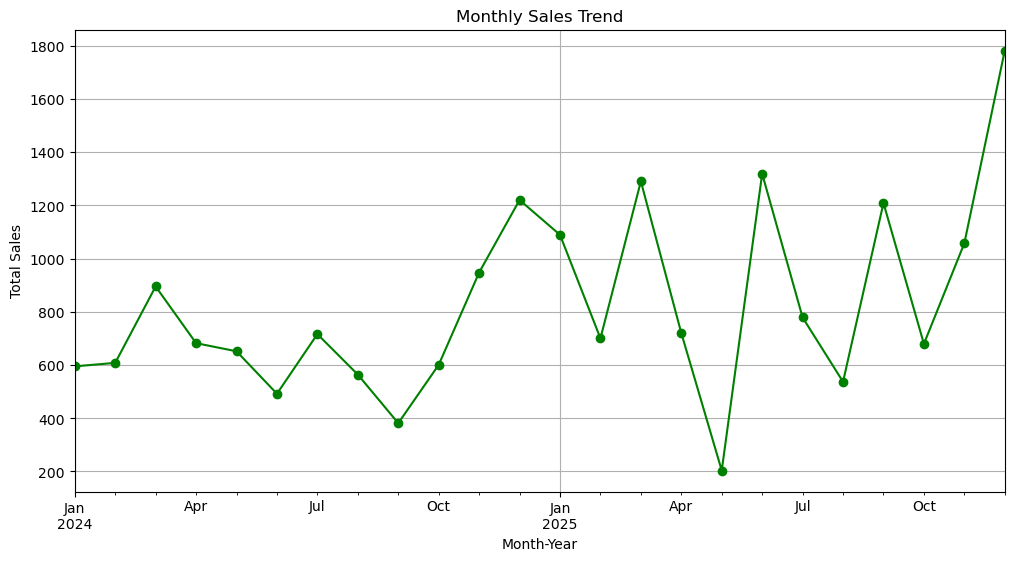

In [28]:
# Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Create Month-Year column
df["month_year"] = df["order_date"].dt.to_period("M")

# Monthly sales
monthly_sales = df.groupby("month_year")["total_price"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month-Year")
plt.grid(True)
plt.show()


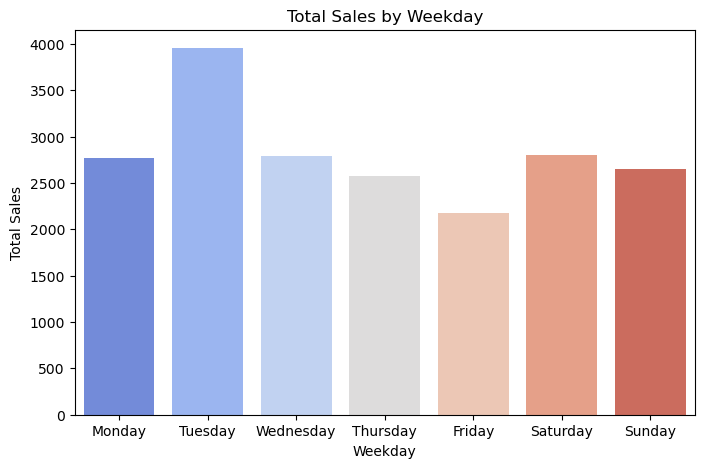

In [29]:
# Weekday sales
df["weekday"] = df["order_date"].dt.day_name()
weekday_sales = df.groupby("weekday")["total_price"].sum()

# Sort weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.reindex(weekday_order)

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Total Sales by Weekday")
plt.ylabel("Total Sales")
plt.xlabel("Weekday")
plt.show()


In [30]:

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["order_date"].dt.month.apply(get_season)

season_sales = df.groupby("season")["total_price"].sum()

plt.figure(figsize=(7,5))
sns.barplot(x=season_sales.index, y=season_sales.values, palette="Set2")
plt.title("Total Sales by Season")
plt.ylabel("Total Sales")
plt.xlabel("Season")
plt.show()


In [31]:
# Total sales by product & region
region_product_sales = df.groupby(["region", "product_name"])["total_price"].sum().reset_index()

# For each region, find the product with max sales
top_products_region = region_product_sales.loc[region_product_sales.groupby("region")["total_price"].idxmax()]

print("Top Product by Region:\n", top_products_region)


Top Product by Region:
    region   product_name  total_price
6    East  Running Shoes       4560.0
16  North  Running Shoes       3760.0
26  South  Running Shoes       6000.0
36   West  Running Shoes       2640.0


In [32]:
# For each region, find the product with min sales
bottom_products_region = region_product_sales.loc[region_product_sales.groupby("region")["total_price"].idxmin()]

print("Lowest Product by Region:\n", bottom_products_region)


Lowest Product by Region:
    region product_name  total_price
5    East      Pen Set       178.50
14  North     Notebook        89.85
25  South      Pen Set        98.00
34   West     Notebook       125.79


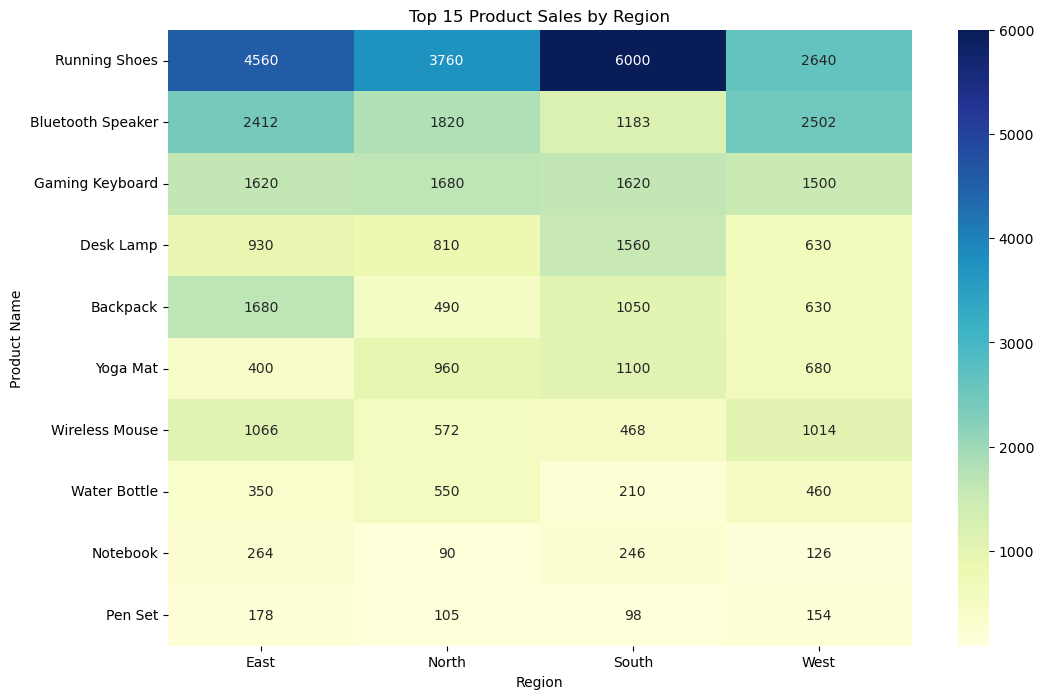

In [33]:
# Create pivot table
pivot_table = region_product_sales.pivot_table(values="total_price", index="product_name", columns="region", fill_value=0)

# Display only top 15 products for clarity
top15_products = df.groupby("product_name")["total_price"].sum().sort_values(ascending=False).head(15).index
pivot_table = pivot_table.loc[top15_products]

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Top 15 Product Sales by Region")
plt.ylabel("Product Name")
plt.xlabel("Region")
plt.show()


In [38]:
# Group by region and product
region_product_sales = df.groupby(["region", "product_name"])["total_price"].sum().reset_index()

# Sort within each region
region_product_sales = region_product_sales.sort_values(["region", "total_price"], ascending=[True, False])

# Get top 3 products per region
top3_products_region = region_product_sales.groupby("region").head(3)

print("Top 3 Products by Region:\n", top3_products_region)


Top 3 Products by Region:
    region       product_name  total_price
6    East      Running Shoes       4560.0
1    East  Bluetooth Speaker       2411.5
0    East           Backpack       1680.0
16  North      Running Shoes       3760.0
11  North  Bluetooth Speaker       1820.0
13  North    Gaming Keyboard       1680.0
26  South      Running Shoes       6000.0
23  South    Gaming Keyboard       1620.0
22  South          Desk Lamp       1560.0
36   West      Running Shoes       2640.0
31   West  Bluetooth Speaker       2502.5
33   West    Gaming Keyboard       1500.0


<Figure size 1200x800 with 0 Axes>

<Figure size 600x500 with 0 Axes>

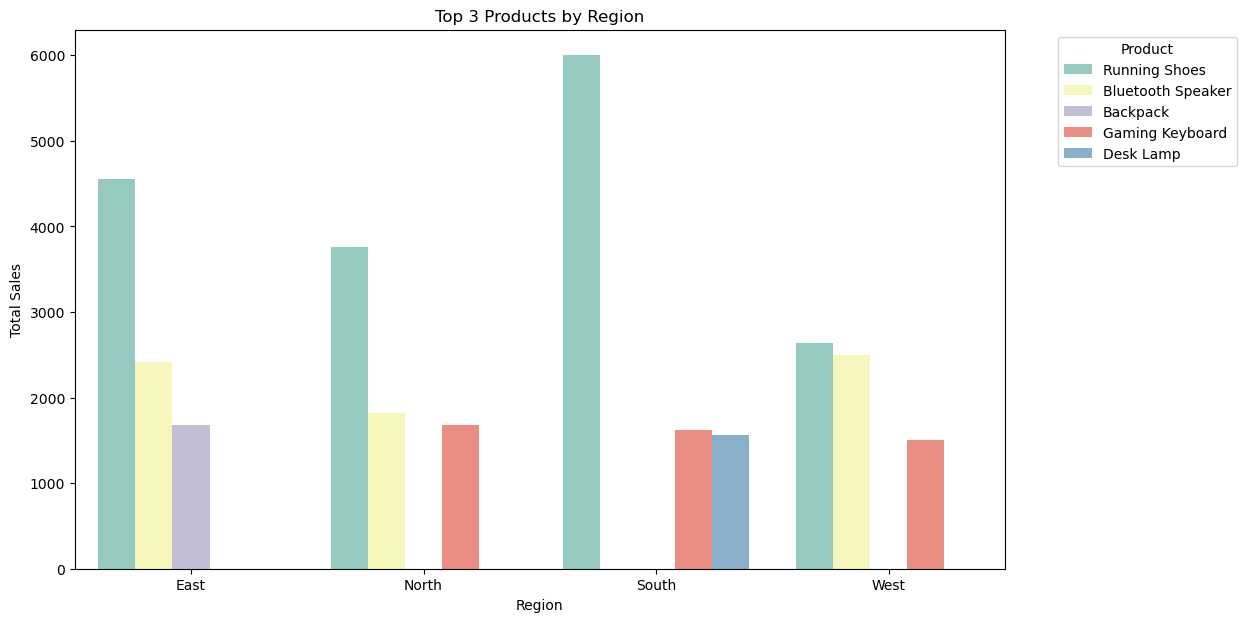

In [39]:
plt.figure(figsize=(12,7))
sns.barplot(data=top3_products_region, x="region", y="total_price", hue="product_name", palette="Set3")
plt.title("Top 3 Products by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.legend(title="Product", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


In [41]:
# Already grouped region-product sales
region_product_sales = df.groupby(["region", "product_name"])["total_price"].sum().reset_index()

# Sort within each region (ascending for lowest sales)
region_product_sales = region_product_sales.sort_values(["region", "total_price"], ascending=[True, True])

# Get bottom 3 products per region
bottom3_products_region = region_product_sales.groupby("region").head(3)

print("Bottom 3 Products by Region:\n", bottom3_products_region)


Bottom 3 Products by Region:
    region  product_name  total_price
5    East       Pen Set       178.50
4    East      Notebook       263.56
7    East  Water Bottle       350.00
14  North      Notebook        89.85
15  North       Pen Set       105.00
10  North      Backpack       490.00
25  South       Pen Set        98.00
27  South  Water Bottle       210.00
24  South      Notebook       245.59
34   West      Notebook       125.79
35   West       Pen Set       154.00
37   West  Water Bottle       460.00


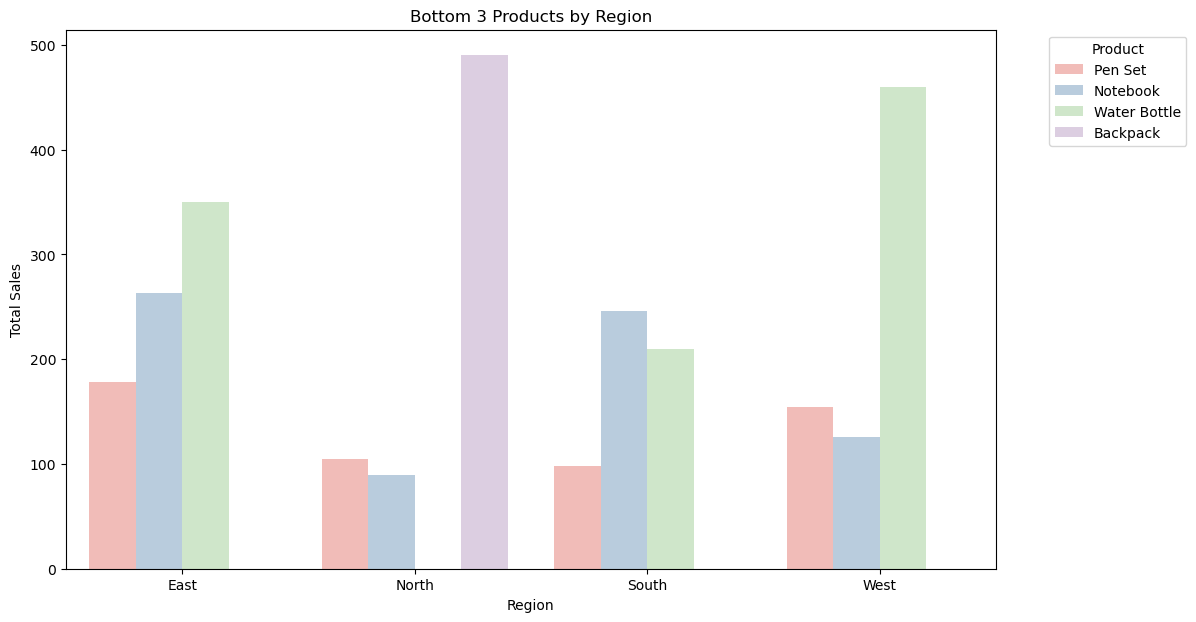

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(data=bottom3_products_region, x="region", y="total_price", hue="product_name", palette="Pastel1")
plt.title("Bottom 3 Products by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.legend(title="Product", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


## PART 2 – Feature Engineering

#### Create new features (e.g., month, weekday, repeat customer indicator)
#### Encode categorical variables (label or one-hot)

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# 2. Create new features
df["month"] = df["order_date"].dt.month
df["weekday"] = df["order_date"].dt.day_name()
df["is_weekend"] = df["weekday"].isin(["Saturday", "Sunday"]).astype(int)

# 3. Repeat customer indicator
df["customer_order_count"] = df.groupby("customer_id")["order_id"].transform("count")
df["is_repeat_customer"] = (df["customer_order_count"] > 1).astype(int)

# 4. Prepare dataset for ML
df_enc = df.drop(columns=["order_id","order_date","customer_id","customer_name","product_id","product_name"])

# Encode target (order_status)
le_status = LabelEncoder()
df_enc["status_encoded"] = le_status.fit_transform(df_enc["order_status"])
df_enc = df_enc.drop(columns=["order_status"])

# 5. One-hot encode categorical variables
df_enc = pd.get_dummies(df_enc, columns=["region", "category", "weekday"], drop_first=True)

# 6. Define features & target
X = df_enc.drop(columns=["status_encoded"])
y = df_enc["status_encoded"]


### TRAIN AND TEST DATA

In [60]:
from sklearn.model_selection import train_test_split

# Ensure numeric features (safety check)
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-Test Split Complete")
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)



✅ Train-Test Split Complete
Train shape: (400, 28)
Test shape : (100, 28)


### Step 2: Train a Classification Model

In [61]:

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

print("✅ Logistic Regression Training Complete")



✅ Logistic Regression Training Complete


In [62]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

print("✅ Decision Tree Training Complete")



✅ Decision Tree Training Complete


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="weighted"))
    print("Recall   :", recall_score(y_true, y_pred, average="weighted"))
    print("F1 Score :", f1_score(y_true, y_pred, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")



--- Logistic Regression ---
Accuracy : 0.82
Precision: 0.6724
Recall   : 0.82
F1 Score : 0.738901098901099

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.82      1.00      0.90        82
           2       0.00      0.00      0.00        13

    accuracy                           0.82       100
   macro avg       0.27      0.33      0.30       100
weighted avg       0.67      0.82      0.74       100


--- Decision Tree ---
Accuracy : 0.78
Precision: 0.7200579710144928
Recall   : 0.78
F1 Score : 0.7432662835249042

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.83      0.93      0.87        82
           2       0.20      0.08      0.11        13

    accuracy                           0.78       100
   macro avg       0.45      0.40      0.41       100
weighted avg       0

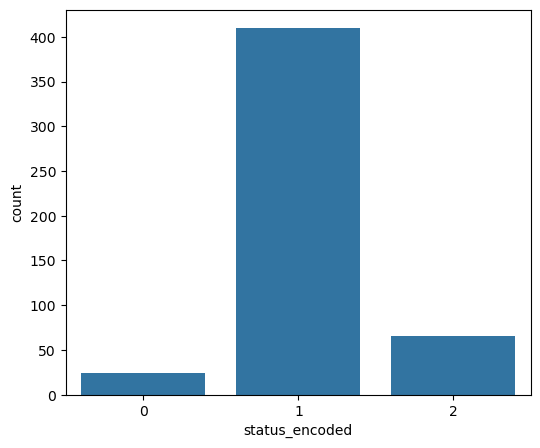

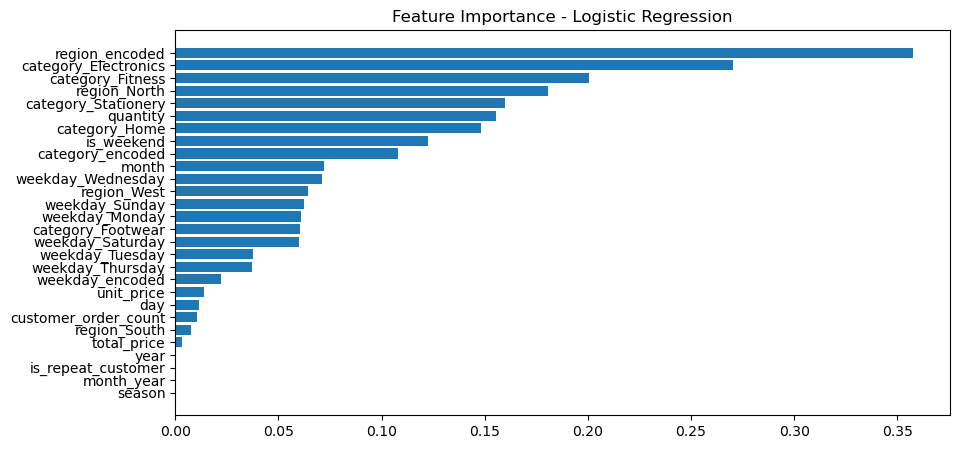

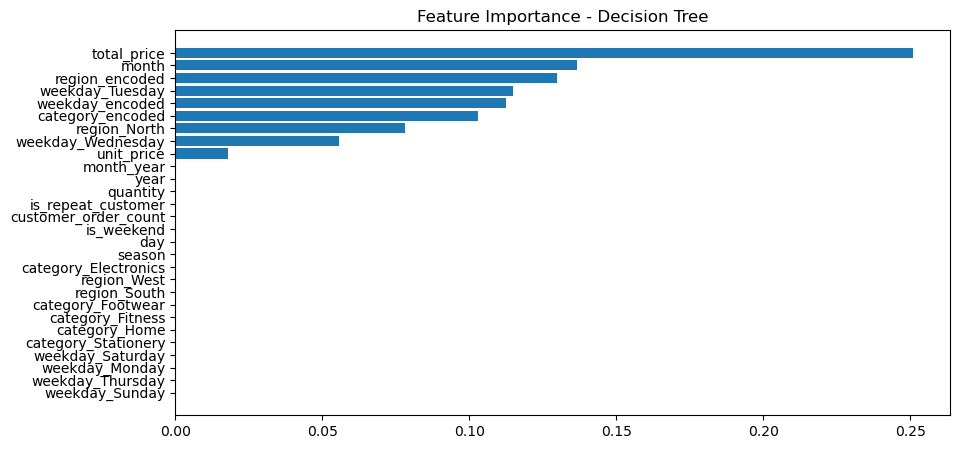

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression feature importance
feature_importance_log = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(log_model.coef_[0])
}).sort_values(by="Importance", ascending=False)

# Plot for Logistic Regression
plt.figure(figsize=(10,5))
plt.barh(feature_importance_log["Feature"], feature_importance_log["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Logistic Regression")
plt.show()

# Decision Tree feature importance
feature_importance_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot for Decision Tree
plt.figure(figsize=(10,5))
plt.barh(feature_importance_dt["Feature"], feature_importance_dt["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Decision Tree")
plt.show()



In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Decision Tree Evaluation
print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.82      1.00      0.90        82
           2       0.00      0.00      0.00        13

    accuracy                           0.82       100
   macro avg       0.27      0.33      0.30       100
weighted avg       0.67      0.82      0.74       100

Accuracy: 0.82

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.83      0.93      0.87        82
           2       0.20      0.08      0.11        13

    accuracy                           0.78       100
   macro avg       0.45      0.40      0.41       100
weighted avg       0.72      0.78      0.74       100

Accuracy: 0.78


In [69]:
# Choose your best model (say Logistic Regression here)
final_predictions = pd.DataFrame({
    "order_id": X_test.index,  
    "Predicted_Status": y_pred_log
})

final_predictions.to_csv("final_predictions.csv", index=False)
print("Predictions saved to final_predictions.csv")


Predictions saved to final_predictions.csv


In [66]:
# Final predictions using Decision Tree (you can switch to Logistic if preferred)
final_pred = dt_model.predict(X)

final_predictions = pd.DataFrame({
    "order_id": df["order_id"],
    "predicted_status": final_pred
})

# Map encoded labels back to original
final_predictions["predicted_status"] = final_predictions["predicted_status"].map(
    dict(zip(le_status.transform(le_status.classes_), le_status.classes_))
)

# Save to CSV
final_predictions.to_csv("final_predictions.csv", index=False)
print("✅ Final predictions saved to 'final_predictions.csv'")


✅ Final predictions saved to 'final_predictions.csv'


In [67]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv("Ecommerce_Sales_Data.csv")

# --- Feature Engineering ---

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

# Extract month and weekday
df['month'] = df['order_date'].dt.month_name()
df['weekday'] = df['order_date'].dt.day_name()

# Repeat Customer Indicator
df['is_repeat_customer'] = df.duplicated(subset='customer_id', keep=False).astype(int)

# Encode order_status into binary for ML (Completed = 1, else 0)
df['order_status_encoded'] = df['order_status'].apply(lambda x: 1 if x == 'Completed' else 0)

# Save the processed dataset
df.to_csv("cleaned_sales.csv", index=False)

print("✅ Cleaned dataset exported successfully as 'cleaned_sales.csv'")


✅ Cleaned dataset exported successfully as 'cleaned_sales.csv'
